# Practica 40 Limpieza de datos con pandas sobre archivos JSON  
## Responder las preguntas propuestas.  
### Aquellas preguntas que ya están respondidas debe explicar el código.

**El archivo JSON `allcandidatenewssample.json` contiene información sobre noticias y artículos relacionados con varias figuras políticas y eventos de campaña. Cada entrada en el JSON representa un artículo o noticia y contiene los siguientes campos:**

`title`: El título del artículo.  

`url`: La URL del artículo.  

`source`: La fuente del artículo, es decir, el medio de comunicación que lo publicó.  

`time`: La hora o tiempo relativo en que se publicó el artículo.  

`date`: La fecha de publicación del artículo en formato de marca de tiempo (timestamp).  

`query`: El tema o figura política relacionada con el artículo.  

`story_position`: La posición de la historia (en una lista de noticias o resultados).  

`panel_position`: La posición en un panel (en la presentación en una página web).  

`domain`: El dominio de la fuente del artículo.  

`category`: La categoría del artículo.  

**Este archivo almacena metadatos sobre varios artículos de noticias políticos, permitiendo análisis sobre la cobertura mediática, la frecuencia de artículos sobre ciertos temas o figuras políticas, y la distribución de fuentes de noticias.**


In [4]:
import pandas as pd
import numpy as np
import json
import pprint
import matplotlib as plt
from collections import Counter

## Análisis con Python clásico  
**Explicar aquellos códigos cuyas preguntas que ya están resueltas**

### Cargar los datos JSON y buscar posibles problemas  
**Utilice el método `json.load` para devolver datos sobre noticias sobre candidatos políticos. `load` devuelve una lista de diccionarios**

In [5]:
with open('allcandidatenewssample.json') as f:
  candidatenews = json.load(f)

### Utilice `len` para obtener el tamaño de la lista, que en este caso es el número total de noticias. (Cada elemento de la lista es un diccionario con claves para el título, la fuente, etc., y sus respectivos valores).

In [6]:
len(candidatenews)

60000

### Utiliza pprint para mostrar los dos primeros diccionarios:

In [7]:
pprint.pprint(candidatenews[0:2]) 

[{'date': '2019-12-25 10:00:00',
  'domain': 'www.nbcnews.com',
  'panel_position': 1,
  'query': 'Michael Bloomberg',
  'source': 'NBC News',
  'story_position': 6,
  'time': '18 hours ago',
  'title': 'Bloomberg cuts ties with company using prison inmates to make '
           'campaign calls',
  'url': 'https://www.nbcnews.com/politics/2020-election/bloomberg-cuts-ties-company-using-prison-inmates-make-campaign-calls-n1106971'},
 {'date': '2019-11-09 08:00:00',
  'domain': 'www.townandcountrymag.com',
  'panel_position': 1,
  'query': 'Amy Klobuchar',
  'source': 'Town & Country Magazine',
  'story_position': 3,
  'time': '18 hours ago',
  'title': "Democratic Candidates React to Michael Bloomberg's Potential Run",
  'url': 'https://www.townandcountrymag.com/society/politics/a29739854/michael-bloomberg-democratic-candidates-campaign-reactions/'}]


### Obtenga el valor de la clave de origen para el primer elemento de la lista:

In [8]:
pprint.pprint(candidatenews[0]['source'])

'NBC News'


## Comprobar si existen diferencias en la estructura de los diccionarios.  
### Utiliza `counter` para comprobar si hay algún diccionario en la lista con menos, o más, de los 9 pares `clave:valor` normales. Mira algunos de los diccionarios que casi no tienen datos (los que sólo tienen dos claves) antes de eliminarlos. 

In [9]:
Counter([len(item) for item in candidatenews])

Counter({9: 57202, 2: 2382, 10: 416})

In [10]:
pprint.pprint(next(item for item in candidatenews if len(item)<9))

{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'}


In [11]:
pprint.pprint(next(item for item in candidatenews if len(item)>9))

{'category': 'Satire',
 'date': '2019-08-21 04:00:00',
 'domain': 'politics.theonion.com',
 'panel_position': 1,
 'query': 'John Hickenlooper',
 'source': 'Politics | The Onion',
 'story_position': 8,
 'time': '4 days ago',
 'title': '‘And Then There Were 23,’ Says Wayne Messam Crossing Out '
          'Hickenlooper Photo \n'
          'In Elaborate Grid Of Rivals',
 'url': 'https://politics.theonion.com/and-then-there-were-23-says-wayne-messam-crossing-ou-1837311060'}


In [12]:
pprint.pprint([item for item in candidatenews if len(item)==2][0:10])

[{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-07-24 00:00:00', 'reason': 'No Top stories'},
 {'date': '2019-08-19 20:00:00', 'reason': 'Not collected'},
 {'date': '2019-09-13 16:00:00', 'reason': 'Not collected'},
 {'date': '2019-10-16 20:00:00', 'reason': 'No Top stories'},
 {'date': '2019-10-17 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-08-02 14:00:00', 'reason': 'Not collected'},
 {'date': '2019-05-27 12:00:00', 'reason': 'Not collected'},
 {'date': '2019-12-03 12:00:00', 'reason': 'No Top stories'},
 {'date': '2019-01-03 00:00:00', 'reason': 'No Top stories'}]


### Confirme que la lista de diccionarios restante tiene la longitud esperada: 60000-2382=57618:

In [13]:
candidatenews = [item for item in candidatenews if len(item)>2]
len(candidatenews)

57618

## Generar recuentos a partir de los datos JSON.  
### Obtenga los diccionarios sólo para `Político` (un sitio web que cubre noticias políticas) y muestre un par de diccionarios:

In [14]:
politico = [item for item in candidatenews if item.get("source") == "Politico"]
len(politico)

2732

In [15]:
pprint.pprint(politico[0:2])

[{'date': '2019-05-18 18:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Marianne Williamson',
  'source': 'Politico',
  'story_position': 7,
  'time': '1 week ago',
  'title': 'Marianne Williamson reaches donor threshold for Dem debates',
  'url': 'https://www.politico.com/story/2019/05/09/marianne-williamson-2020-election-1315133'},
 {'date': '2018-12-27 06:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Julian Castro',
  'source': 'Politico',
  'story_position': 1,
  'time': '1 hour ago',
  'title': "O'Rourke and Castro on collision course in Texas",
  'url': 'https://www.politico.com/story/2018/12/27/orourke-julian-castro-collision-texas-election-1073720'}]


## Obtenga los datos de `source` y confirme que tienen la longitud prevista.  
### Mostrar los primeros elementos de la nueva lista sources. 

In [16]:
sources = [item.get('source') for item in candidatenews if 'source' in item]
type(sources)

list

In [17]:
len(sources)

57618

In [18]:
sources[0:5]

['NBC News', 'Town & Country Magazine', 'TheHill', 'CNBC.com', 'Fox News']

### Generar un recuento de noticias por fuente y muestra las 10 fuentes más populares. Observe que las noticias de The Hill pueden tener TheHill (sin espacio) o The Hill como valor para la fuente :

In [19]:
pprint.pprint(Counter(sources).most_common(10))

[('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('TheHill', 2383),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('The Hill', 1342),
 ('New York Post', 1275),
 ('Vox', 941)]


## Corrige cualquier error en los valores del diccionario.

### Corrige los valores de la 'source' `The Hill` . Observe que `The Hill` es ahora la fuente fuente más frecuente de noticias:

In [20]:
for newsdict in candidatenews:
    newsdict.update((k, "The Hill") for k, v in newsdict.items()
                    if k == "source" and v == "TheHill")
sources = [item.get('source') for item in candidatenews]
pprint.pprint(Counter(sources).most_common(10))

[('The Hill', 3725),
 ('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('New York Post', 1275),
 ('Vox', 941),
 ('Breitbart', 799)]


# Análisis del archivo json con Pandas

## Crear un dataframe de Pandas  
### 1- Pase los datos JSON al método pandas DataFrame.

In [21]:
import pandas as pd
import json

# Definir la ruta del archivo JSON
file_path = 'allcandidatenewssample.json'

# Cargar los datos JSON del archivo
with open(file_path, 'r') as f:
    data = json.load(f)

# Convertir a DataFrame
df = pd.json_normalize(data, max_level=1)

# Mostrar las primeras filas del DataFrame para verificar la carga
print(df.head())


                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time                 date              query  story_position  \
0  18 hours ago  2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago  2019-11-0

### 2- Convierta la columna date a un tipo de datos datetime:

In [22]:
# Convertir la columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Mostrar las primeras filas del DataFrame después de la conversión
print("\nDespués de la conversión:")
print(df.head())


Después de la conversión:
                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time                date              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1

In [23]:
print(df.dtypes)


title                     object
url                       object
source                    object
time                      object
date              datetime64[ns]
query                     object
story_position           float64
panel_position            object
domain                    object
reason                    object
category                  object
dtype: object


### 3- Cambiar el nombre de la columna `date` por `storydate`:

In [24]:
# Cambiar el nombre de la columna 'date' a 'storydate'
df.rename(columns={'date': 'storydate'}, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df.head())

                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 4- Cambiar el dtype de la columna `storydate` por `datetiem64[ns]`

In [25]:
# Cambiar el dtype de la columna 'storydate' a datetime64[ns]
df['storydate'] = pd.to_datetime(df['storydate'])

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Verificar el tipo de datos de la columna 'storydate'
print(df.dtypes)

                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 5- Nuestre los tipos de datos

In [26]:
# Verificar el tipo de datos de la columna 'storydate'
print(df.dtypes)

title                     object
url                       object
source                    object
time                      object
storydate         datetime64[ns]
query                     object
story_position           float64
panel_position            object
domain                    object
reason                    object
category                  object
dtype: object


### 6- Dimensiones del dataframe (shape)

In [27]:
# Obtener las dimensiones del DataFrame
dimensions = df.shape
print("\nDimensiones del DataFrame:", dimensions)


Dimensiones del DataFrame: (60000, 11)


### 7- Muestra las 10 fuentes (sources) más comunes en el DataFrame `candidatenewsdf` con pandas, junto con el número de veces que cada fuente aparece.

In [28]:
# Mostrar las 10 fuentes más comunes
top_10_sources = df['source'].value_counts().head(10)
print("\nLas 10 fuentes más comunes:\n", top_10_sources)


Las 10 fuentes más comunes:
 source
Fox News               3530
CNN.com                2750
Politico               2732
TheHill                2383
The New York Times     1804
Washington Post        1770
Washington Examiner    1655
The Hill               1342
New York Post          1275
Vox                     941
Name: count, dtype: int64


### 8- Mostrar las primeras 5 filas del DataFrame

In [29]:
# Mostrar las primeras 5 filas del DataFrame
print(df.head())


                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 9- Mostrar las ultimas 15 lineas del dataframe

In [30]:
# Mostrar las últimas 15 filas del DataFrame
print(df.tail(15))


                                                   title  \
59985        Michael Bennet to open fundraisers to press   
59986  Paul Tudor Jones: Trump is 'the greatest sales...   
59987       What "The West Wing" reveals about Joe Biden   
59988              Delaney: "I'm planning on staying in"   
59989  Sen. Kamala Harris introduces bill to lengthen...   
59990  Wayne Messam: Money Kept Me Out of the First D...   
59991  Billionaire Tom Steyer raises $2 million for W...   
59992  Ilhan Omar, Kamala Harris Respond To “Send Her...   
59993  Kamala Harris Attended LA Fundraisers The Same...   
59994  Northern Iowa voters tell presidential candida...   
59995  NH Primary Source: Cory Booker's presidential ...   
59996       John Delaney Creates His Own Campaign Bounce   
59997  Mayor de Blasio calls for charges against driv...   
59998  Elizabeth Warren Narrows Joe Biden Lead Among ...   
59999  Kamala Harris demands answers on California pr...   

                                       

### 10- Filtrar los artículos donde la fuente (source) es "Politico"

In [31]:
# Filtrar los artículos donde la fuente es "Politico"
politico_articles = df[df['source'] == 'Politico']

# Mostrar las primeras filas del DataFrame filtrado
print(politico_articles.head())


                                                 title  \
23   Marianne Williamson reaches donor threshold fo...   
102   O'Rourke and Castro on collision course in Texas   
221  Democrats try out their Spanish on TV as they ...   
238          Pennsylvania suburbs revolt against Trump   
248  Beto O'Rourke in talks with strategists ahead ...   

                                                   url    source  \
23   https://www.politico.com/story/2019/05/09/mari...  Politico   
102  https://www.politico.com/story/2018/12/27/orou...  Politico   
221  https://www.politico.com/story/2019/06/25/demo...  Politico   
238  https://www.politico.com/news/2019/11/06/penns...  Politico   
248  https://www.politico.com/story/2019/02/15/beto...  Politico   

             time           storydate                query  story_position  \
23     1 week ago 2019-05-18 18:00:00  Marianne Williamson             7.0   
102    1 hour ago 2018-12-27 06:00:00        Julian Castro             1.0   
221  23 

### 11- Filtrar los artículos publicados después del 21 de diciembre de 2019

In [33]:
# Filtrar los artículos publicados después del 21 de diciembre de 2019
date_filter = df[df['storydate'] > '2019-12-21']

# Mostrar las primeras filas del DataFrame filtrado
print(date_filter.head())


                                                 title  \
0    Bloomberg cuts ties with company using prison ...   
10   De Blasio blows off yeshiva 'horse trade' ques...   
72   Bloomberg Expands Staffing Plan to More Battle...   
116  Sen. Amy Klobuchar, trying to crack Democrats'...   
121  State's current longest-serving lawmaker calls...   

                                                   url  \
0    https://www.nbcnews.com/politics/2020-election...   
10   https://nypost.com/2019/12/20/de-blasio-blows-...   
72   https://www.wsj.com/articles/bloomberg-expands...   
116  http://www.startribune.com/sen-amy-klobuchar-t...   
121  https://www.kitsapsun.com/story/news/2019/12/2...   

                      source          time           storydate  \
0                   NBC News  18 hours ago 2019-12-25 10:00:00   
10             New York Post     1 day ago 2019-12-22 08:00:00   
72   The Wall Street Journal  19 hours ago 2019-12-22 10:00:00   
116             Star Tribune     1 day

### 12- Filtrar y mostrar los artículos de "CNN.com"

In [34]:
# Filtrar los artículos donde la fuente es "CNN.com"
cnn_articles = df[df['source'] == 'CNN.com']

# Mostrar las primeras filas del DataFrame filtrado
print(cnn_articles.head())


                                                 title  \
17   Bernie Sanders stays on the stump after receiv...   
18   Trump says he spoke with Putin about 'Russian ...   
31   McConnell will move to acquit Trump if he's im...   
66   Here's what Sanford said about voting for Trum...   
111  First on CNN: Respected foreign policy veteran...   

                                                   url   source          time  \
17   https://www.cnn.com/2019/03/15/politics/bernie...  CNN.com    1 hour ago   
18   https://www.cnn.com/2019/05/03/politics/trump-...  CNN.com   4 hours ago   
31   https://www.cnn.com/2019/12/11/politics/mcconn...  CNN.com   6 hours ago   
66   https://www.cnn.com/2019/08/18/politics/mark-s...  CNN.com   2 hours ago   
111  https://www.cnn.com/2019/07/21/politics/nichol...  CNN.com  18 hours ago   

              storydate           query  story_position panel_position  \
17  2019-03-16 06:00:00  Bernie Sanders             1.0              1   
18  2019-05-04 1

### 13- Contar los valores nulos en cada columna

In [35]:
# Contar los valores nulos en cada columna
null_counts = df.isnull().sum()

# Mostrar los resultados
print(null_counts)


title              2382
url                2382
source             2382
time               2382
storydate             0
query              2382
story_position     2382
panel_position     2382
domain             2382
reason            57618
category          59584
dtype: int64


### 14- Eliminar filas con valores nulos en la columna "title"

In [36]:
# Eliminar filas con valores nulos en la columna "title"
df_cleaned = df.dropna(subset=['title'])

# Mostrar las primeras filas del DataFrame limpiado para verificar los cambios
print(df_cleaned.head())

# Mostrar las dimensiones del DataFrame antes y después de la limpieza
print("Dimensiones antes de la limpieza:", df.shape)
print("Dimensiones después de la limpieza:", df_cleaned.shape)


                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   
5  Liberal billionaire Tom Steyer scolds Dems for...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   
5  https://www.foxnews.com/politics/liberal-billi...                 Fox News   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 15- Rellenar valores nulos en la columna "category" con "Unknown"

In [37]:
# Rellenar valores nulos en la columna "category" con "Unknown"
df['category'] = df['category'].fillna('Unknown')

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Verificar si quedan valores nulos en la columna "category"
null_counts_category = df['category'].isnull().sum()
print("\nValores nulos en 'category' después de rellenar:", null_counts_category)


                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 16- Convertir la columna "panel_position" a tipo float

In [39]:
# Manejar valores no numéricos y nulos antes de la conversión
df['panel_position'] = pd.to_numeric(df['panel_position'], errors='coerce')

# Convertir la columna 'panel_position' a tipo float (ya debería estar en float después de pd.to_numeric)
df['panel_position'] = df['panel_position'].astype(float)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Verificar el tipo de datos de la columna 'panel_position'
print("\nTipo de datos de 'panel_position' después de la conversión:", df['panel_position'].dtype)



                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 17- Convertir la columna "storydate" a tipo string

In [40]:
# Convertir la columna 'storydate' a tipo string
df['storydate'] = df['storydate'].astype(str)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Verificar el tipo de datos de la columna 'storydate'
print("\nTipo de datos de 'storydate' después de la conversión:", df['storydate'].dtype)


                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time            storydate              query  story_position  \
0  18 hours ago  2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago  2019-11-0

### 18- Obtener la media de "story_position"

In [42]:
# Asegurarse de que la columna 'story_position' sea de tipo float
df['story_position'] = pd.to_numeric(df['story_position'], errors='coerce')

# Calcular la media de la columna 'story_position'
mean_story_position = df['story_position'].mean()

# Mostrar la media
print("La media de 'story_position' es:", mean_story_position)



La media de 'story_position' es: 5.249626852719636


### 19- Obtener la desviación estándar de "story_position"

In [43]:
# Asegurarse de que la columna 'story_position' sea de tipo float
df['story_position'] = pd.to_numeric(df['story_position'], errors='coerce')

# Calcular la desviación estándar de la columna 'story_position'
std_story_position = df['story_position'].std()

# Mostrar la desviación estándar
print("La desviación estándar de 'story_position' es:", std_story_position)


La desviación estándar de 'story_position' es: 2.8890019221954377


### 20- Obtener la cantidad de artículos por fuente (source)

In [44]:
# Obtener la cantidad de artículos por fuente (source)
articles_per_source = df['source'].value_counts()

# Mostrar el resultado
print(articles_per_source)


source
Fox News               3530
CNN.com                2750
Politico               2732
TheHill                2383
The New York Times     1804
                       ... 
WIS                       1
+972 Magazine             1
YakTriNews                1
KNIA KRLS                 1
The Winchester Star       1
Name: count, Length: 1724, dtype: int64


### 21- Obtener el valor mínimo y máximo de "story_position"

In [45]:
# Asegurarse de que la columna 'story_position' sea de tipo float
df['story_position'] = pd.to_numeric(df['story_position'], errors='coerce')

# Obtener el valor mínimo de 'story_position'
min_story_position = df['story_position'].min()

# Obtener el valor máximo de 'story_position'
max_story_position = df['story_position'].max()

# Mostrar los resultados
print("El valor mínimo de 'story_position' es:", min_story_position)
print("El valor máximo de 'story_position' es:", max_story_position)


El valor mínimo de 'story_position' es: 1.0
El valor máximo de 'story_position' es: 10.0


### 22- Agrupar por la columna "source" y contar el número de artículos

In [47]:
# Agrupar por la columna 'source' y contar el número de artículos
articles_grouped_by_source = df.groupby('source').size()

# Mostrar el resultado
print(articles_grouped_by_source)


source
                          2
+972 Magazine             1
1010 Wins - Radio.com    25
1011 News                 1
1011Now                   1
                         ..
theGrio                  31
uPolitics                11
vtdigger.org              1
wgbh.org                  2
whotv.com                92
Length: 1724, dtype: int64


### 23- Crear una tabla pivot para analizar la posición de los artículos por fuente

In [49]:
# Crear una tabla pivot para analizar la posición de los artículos por fuente
pivot_table = pd.pivot_table(df, values='story_position', index='source', aggfunc=['mean', 'min', 'max', 'std'])

# Mostrar la tabla pivot
print(pivot_table)


                                mean            min            max  \
                      story_position story_position story_position   
source                                                               
                            4.500000            1.0            8.0   
+972 Magazine               7.000000            7.0            7.0   
1010 Wins - Radio.com       7.520000            4.0           10.0   
1011 News                   2.000000            2.0            2.0   
1011Now                     2.000000            2.0            2.0   
...                              ...            ...            ...   
theGrio                     6.419355            2.0           10.0   
uPolitics                   3.818182            2.0            9.0   
vtdigger.org                1.000000            1.0            1.0   
wgbh.org                    1.000000            1.0            1.0   
whotv.com                   4.510870            1.0           10.0   

                   

### 24- Agrupar por "storydate" y contar el número de artículos por día

In [51]:
# Asegurarse de que la columna 'storydate' es de tipo datetime
df['storydate'] = pd.to_datetime(df['storydate'])

# Agrupar por la columna 'storydate' y contar el número de artículos por día
articles_per_day = df.groupby('storydate').size()

# Mostrar el resultado
print(articles_per_day)


storydate
2018-12-16 00:00:00    21
2018-12-16 06:00:00    23
2018-12-16 12:00:00    17
2018-12-16 18:00:00    19
2018-12-17 00:00:00    16
                       ..
2019-12-30 14:00:00    16
2019-12-30 16:00:00    15
2019-12-30 18:00:00     7
2019-12-30 20:00:00    18
2019-12-30 22:00:00    20
Length: 3024, dtype: int64


### 25- Graficar el número de artículos por las 10 principales fuentes (explicar código)

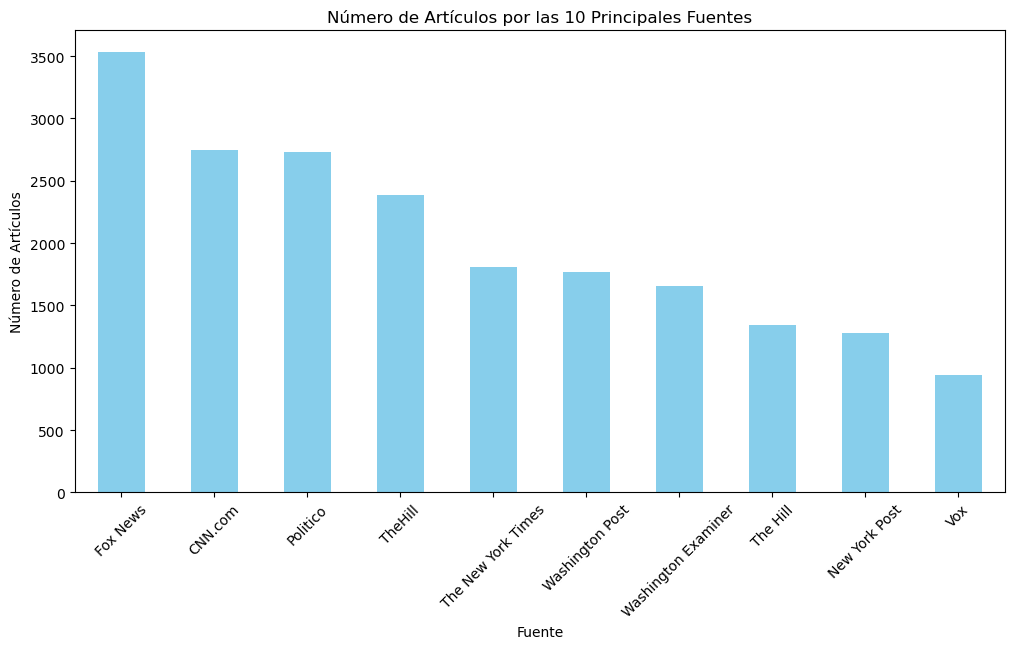

In [54]:
# Contar el número de artículos por fuente y seleccionar las 10 principales
top_10_sources = df['source'].value_counts().head(10)

# Graficar el número de artículos por las 10 principales fuentes
plt.figure(figsize=(12, 6))
top_10_sources.plot(kind='bar', color='skyblue')
plt.title('Número de Artículos por las 10 Principales Fuentes')
plt.xlabel('Fuente')
plt.ylabel('Número de Artículos')
plt.xticks(rotation=45)
plt.show()

### 26- Graficar la distribución de "story_position"

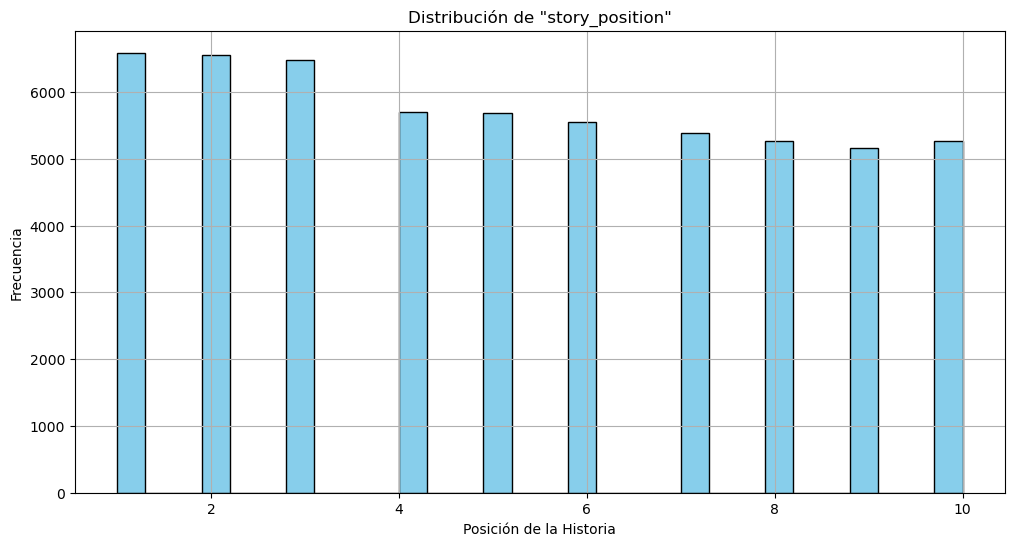

In [55]:
import matplotlib.pyplot as plt

# Graficar la distribución de 'story_position'
plt.figure(figsize=(12, 6))
plt.hist(df['story_position'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de "story_position"')
plt.xlabel('Posición de la Historia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### 27- Convertir la columna "storydate" a formato datetime

In [56]:
# Convertir la columna 'storydate' a formato datetime
df['storydate'] = pd.to_datetime(df['storydate'], errors='coerce')

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Verificar el tipo de datos de la columna 'storydate'
print("\nTipo de datos de 'storydate' después de la conversión:", df['storydate'].dtype)

                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 28- Crear una nueva columna con el año de "storydate"

In [57]:
# Crear una nueva columna con el año de 'storydate'
df['year'] = df['storydate'].dt.year

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Verificar el tipo de datos de la nueva columna 'year'
print("\nTipo de datos de 'year':", df['year'].dtype)

                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 29- Crear una nueva columna con el mes de "storydate"

In [58]:
# Crear una nueva columna con el mes de 'storydate'
df['month'] = df['storydate'].dt.month

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df.head())

# Verificar el tipo de datos de la nueva columna 'month'
print("\nTipo de datos de 'month':", df['month'].dtype)

                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 30- Convertir el DataFrame filtrado de "CNN.com" a formato JSON

In [59]:
# Filtrar los artículos donde la fuente es "CNN.com"
cnn_articles = df[df['source'] == 'CNN.com']

# Convertir el DataFrame filtrado a formato JSON
cnn_articles_json = cnn_articles.to_json(orient='records', lines=True)

# Mostrar los primeros 500 caracteres del JSON resultante para verificar
print(cnn_articles_json[:500])

# Guardar el JSON resultante en un archivo (opcional)
with open('cnn_articles.json', 'w') as file:
    file.write(cnn_articles_json)

{"title":"Bernie Sanders stays on the stump after receiving stitches for head wound","url":"https:\/\/www.cnn.com\/2019\/03\/15\/politics\/bernie-sanders-stitches-south-carolina\/index.html","source":"CNN.com","time":"1 hour ago","storydate":1552716000000,"query":"Bernie Sanders","story_position":1.0,"panel_position":1.0,"domain":"www.cnn.com","reason":null,"category":"Unknown","year":2019,"month":3}
{"title":"Trump says he spoke with Putin about 'Russian hoax,' didn't warn him \nagainst 2020 el


### 31- Exportar el DataFrame filtrado de "CNN.com" a un archivo CSV

In [60]:
# Filtrar los artículos donde la fuente es "CNN.com"
cnn_articles = df[df['source'] == 'CNN.com']

# Exportar el DataFrame filtrado a un archivo CSV
cnn_articles.to_csv('cnn_articles.csv', index=False)

# Confirmación de exportación
print("El DataFrame filtrado se ha exportado a 'cnn_articles.csv'")

El DataFrame filtrado se ha exportado a 'cnn_articles.csv'


### 32- Mostrar los artículos con la mayor "story_position" por fuente

In [61]:
# Encontrar los índices de las filas con la mayor 'story_position' por fuente
idx = df.groupby('source')['story_position'].idxmax()

# Seleccionar las filas correspondientes a esos índices
max_story_position_articles = df.loc[idx]

# Mostrar los artículos con la mayor 'story_position' por fuente
print(max_story_position_articles)

                                                   title  \
53436  The HillTrump boasts of bigger El Paso crowd t...   
23520  On Palestine-Israel, Cory Booker and Kamala Ha...   
1785   Mayor de Blasio launches new resources for hom...   
11287  Starbucks CEO to appear Sept. 27 at the Univer...   
15399  Starbucks CEO to appear Sept. 27 at the Univer...   
...                                                  ...   
11170  In a unique gesture, presidential candidate Ma...   
47045  VIDEO EXCLUSIVE: Democratic 2020 Presidential ...   
26333  Bernie Sanders’ spiritual supporter turns 2020...   
7891   Rep. Seth Moulton Calls For Democratic Majorit...   
3239   Insiders 10/27/19: Beto O’Rourke Says it is Re...   

                                                     url  \
53436  https://thehill.com/homenews/administration/42...   
23520  https://972mag.com/black-palestine-democratic-...   
1785   https://1010wins.radio.com/articles/mayor-de-b...   
11287  https://www.1011now.com/content/

### 33- Calcular el resumen estadístico de la columna "story_position"

In [62]:
# Calcular el resumen estadístico de la columna 'story_position'
summary_stats = df['story_position'].describe()

# Mostrar el resumen estadístico
print(summary_stats)

count    57618.000000
mean         5.249627
std          2.889002
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: story_position, dtype: float64


### 34- Calcular el conteo de valores únicos en la columna "query"

In [63]:
# Calcular el conteo de valores únicos en la columna 'query'
unique_query_count = df['query'].nunique()

# Mostrar el conteo de valores únicos
print("El número de valores únicos en la columna 'query' es:", unique_query_count)

El número de valores únicos en la columna 'query' es: 30


### 35- Calcular o contar los valores faltantes de cada columna

In [64]:
# Calcular el conteo de valores faltantes en cada columna
missing_values_count = df.isnull().sum()

# Mostrar el conteo de valores faltantes
print("Conteo de valores faltantes en cada columna:")
print(missing_values_count)

Conteo de valores faltantes en cada columna:
title              2382
url                2382
source             2382
time               2382
storydate             0
query              2382
story_position     2382
panel_position     2415
domain             2382
reason            57618
category              0
year                  0
month                 0
dtype: int64


### 36- Filtrar filas donde falta algún dato

In [65]:
# Filtrar filas donde falta algún dato
df_filtered = df.dropna(how='any')

# Mostrar las primeras filas del DataFrame filtrado
print(df_filtered.head())

# Mostrar el número de filas antes y después de filtrar
print("\nNúmero de filas antes de filtrar:", df.shape[0])
print("Número de filas después de filtrar:", df_filtered.shape[0])

Empty DataFrame
Columns: [title, url, source, time, storydate, query, story_position, panel_position, domain, reason, category, year, month]
Index: []

Número de filas antes de filtrar: 60000
Número de filas después de filtrar: 0


### 37- Borrar la columna `category` del dataframe y guardarlo en otro dataframe

In [66]:
# Borrar la columna 'category' y guardar el resultado en otro DataFrame
df_without_category = df.drop(columns=['category'])

# Mostrar las primeras filas del nuevo DataFrame para verificar los cambios
print(df_without_category.head())

# Mostrar las columnas del nuevo DataFrame para confirmar la eliminación
print("\nColumnas del DataFrame sin la columna 'category':")
print(df_without_category.columns)

                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
2                                                NaN   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
2                                                NaN                      NaN   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 38- Filtrar filas donde la columna 'source' está vacía o es nula

In [67]:
# Filtrar filas donde la columna 'source' está vacía o es nula
filtered_df = df.loc[df['source'].isnull() | (df['source'] == '')]

# Mostrar las primeras filas del DataFrame filtrado para verificar los cambios
print(filtered_df.head())

# Mostrar el número de filas antes y después de filtrar
print("\nNúmero de filas antes de filtrar:", df.shape[0])
print("Número de filas después de filtrar:", filtered_df.shape[0])

   title  url source time           storydate query  story_position  \
2    NaN  NaN    NaN  NaN 2019-09-11 18:00:00   NaN             NaN   
45   NaN  NaN    NaN  NaN 2019-07-24 00:00:00   NaN             NaN   
55   NaN  NaN    NaN  NaN 2019-08-19 20:00:00   NaN             NaN   
60   NaN  NaN    NaN  NaN 2019-09-13 16:00:00   NaN             NaN   
62   NaN  NaN    NaN  NaN 2019-10-16 20:00:00   NaN             NaN   

    panel_position domain          reason category  year  month  
2              NaN    NaN   Not collected  Unknown  2019      9  
45             NaN    NaN  No Top stories  Unknown  2019      7  
55             NaN    NaN   Not collected  Unknown  2019      8  
60             NaN    NaN   Not collected  Unknown  2019      9  
62             NaN    NaN  No Top stories  Unknown  2019     10  

Número de filas antes de filtrar: 60000
Número de filas después de filtrar: 2384


### 39-  Eliminar filas donde la columna 'source' está vacía o es nula

In [68]:

# Eliminar filas donde la columna 'source' está vacía o es nula
df_cleaned = df.dropna(subset=['source'])
df_cleaned = df_cleaned[df_cleaned['source'] != '']

# Mostrar las primeras filas del DataFrame limpio para verificar los cambios
print(df_cleaned.head())

# Mostrar el número de filas antes y después de limpiar
print("\nNúmero de filas antes de limpiar:", df.shape[0])
print("Número de filas después de limpiar:", df_cleaned.shape[0])

                                               title  \
0  Bloomberg cuts ties with company using prison ...   
1  Democratic Candidates React to Michael Bloombe...   
3  Sanders responds to de Blasio's invitation to ...   
4  From Andrew Yang's 'No Tie' look to Bernie Buc...   
5  Liberal billionaire Tom Steyer scolds Dems for...   

                                                 url                   source  \
0  https://www.nbcnews.com/politics/2020-election...                 NBC News   
1  https://www.townandcountrymag.com/society/poli...  Town & Country Magazine   
3  https://thehill.com/homenews/campaign/456579-s...                  TheHill   
4  https://www.cnbc.com/2019/08/02/election-2020-...                 CNBC.com   
5  https://www.foxnews.com/politics/liberal-billi...                 Fox News   

           time           storydate              query  story_position  \
0  18 hours ago 2019-12-25 10:00:00  Michael Bloomberg             6.0   
1  18 hours ago 2019-11-09 0

### 40- Calcular la media de la columna story_position para cada query

In [69]:
# Calcular la media de la columna 'story_position' para cada 'query'
mean_story_position_per_query = df.groupby('query')['story_position'].mean()

# Mostrar el resultado
print(mean_story_position_per_query)

query
Amy Klobuchar          5.485017
Andrew Yang            5.477004
Bernie Sanders         5.456418
Beto O Rourke          5.403399
Bill Weld              4.728591
Bill de Blasio         5.513235
Cory Booker            5.460512
Deval Patrick          5.191441
Donald Trump           5.484837
Elizabeth Warren       5.482407
Eric Swalwell          5.214198
Howard Schultz         4.776099
Jay Inslee             4.954359
Joe Biden              5.424632
John Delaney           4.452242
John Hickenlooper      4.911681
Julian Castro          5.374422
Kamala Harris          5.484781
Kirsten Gillibrand     5.284419
Marianne Williamson    5.144767
Michael Bennet         4.760052
Michael Bloomberg      4.865504
Mike Gravel            4.976323
Pete Buttigieg         5.392045
Seth Moulton           4.917058
Steve Bullock          5.042918
Tim Ryan               4.932613
Tom Steyer             5.032000
Tulsi Gabbard          5.509031
Wayne Messam           3.119266
Name: story_position, dtype: float